In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Access the file
file_path = "/content/drive/MyDrive/indian_food.csv"

data = pd.read_csv(file_path)
data

Mounted at /content/drive


,name,ingredients,diet,diet.1,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,20,40,spicy,main course,Uttar Pradesh,North
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,20,40,spicy,main course,Uttar Pradesh,North


In [ ]:
num_row = len(data)
num_row

99

In [ ]:
unique_diets = data["diet"].value_counts()
unique_diets

vegetarian        91
non vegetarian     8
Name: diet, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            99 non-null     object
 1   ingredients     99 non-null     object
 2   diet            99 non-null     object
 3   diet.1          99 non-null     object
 4   cook_time       99 non-null     int64 
 5   flavor_profile  99 non-null     object
 6   course          99 non-null     object
 7   state           99 non-null     object
 8   region          99 non-null     object
dtypes: int64(1), object(8)
memory usage: 7.1+ KB


In [ ]:
data = data.drop(['diet.1'], axis=1)


In [ ]:
data

,name,ingredients,diet,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,20,spicy,main course,-1,-1
95,Kofta,"Paneer, potato, cream, corn flour, garam masala",vegetarian,40,spicy,main course,Uttar Pradesh,North
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,25,sweet,dessert,-1,-1
97,Lauki ke kofte,"Bottle gourd, garam masala powder, gram flour,...",vegetarian,40,spicy,main course,Uttar Pradesh,North


# Analysing **ingredients**

In [ ]:
data["ingredients"] = data['ingredients'].str.lower()

In [ ]:
data

,name,ingredients,diet,cook_time,flavor_profile,course,state,region
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,25,sweet,dessert,West Bengal,East
1,Boondi,"gram flour, ghee, sugar",vegetarian,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60,sweet,dessert,Punjab,North
3,Ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"milk powder, plain flour, baking powder, ghee,...",vegetarian,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...
94,Khichdi,"moong dal, green peas, ginger, tomato, green c...",vegetarian,20,spicy,main course,-1,-1
95,Kofta,"paneer, potato, cream, corn flour, garam masala",vegetarian,40,spicy,main course,Uttar Pradesh,North
96,Kulfi falooda,"rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,25,sweet,dessert,-1,-1
97,Lauki ke kofte,"bottle gourd, garam masala powder, gram flour,...",vegetarian,40,spicy,main course,Uttar Pradesh,North


In [ ]:
# Step 1: Identify Multi-Word Ingredients
data['Multi_Word_Ingredients'] = data['ingredients'].str.split(', ').apply(lambda x: [item for item in x if ' ' in item])

# Step 2: Extract and See Multi-Word Ingredients as a List
multi_word_ingredients_list = data['Multi_Word_Ingredients'].explode().dropna().unique()

# Print the list of multi-word ingredients
multi_word_ingredients_list

array(['maida flour', 'gram flour', 'clarified butter', 'green cardamom',
       'milk powder', 'plain flour', 'baking powder', 'rose water',
       'sugar syrup', 'lentil flour', 'corn flour', 'baking soda',
       'cottage cheese', 'dried fruits', 'refined flour',
       'powdered sugar', 'firm white pumpkin', 'kitchen lime',
       'alum powder', 'condensed milk', 'molu leaf', 'dry fruits',
       'chenna cheese', 'lemon juice', 'coconut flakes',
       'fried milk power', 'fennel seeds', 'besan flour', 'rice flour',
       'wheat flour', 'sweetened milk', 'reduced milk', 'vegetable oil',
       'cardamom powder', 'cashews and raisins', 'jaggery syrup',
       'dharwadi buffalo milk', 'loaf bread', 'black lentils',
       'mung bean', 'skimmed milk powder', 'chana dal',
       'vermicelli pudding', 'khus-khus seeds', 'jaggery ', 'boiled pork',
       'ginger and garlic', 'garam masala', 'curry leaves',
       'bread crumbs', 'fenugreek leaves', 'shimla mirch',
       'amchur powder'

In [ ]:
def replace_flour_phrase(ingredients):
    ingredients_list = ingredients.split(', ')
    updated_ingredients = []
    for ingredient in ingredients_list:
        if 'flour' in ingredient.lower() and len(ingredient.split()) in [2, 3]:
            updated_ingredients.append('flour')
        elif 'milk' in ingredient.lower() and len(ingredient.split()) in [2, 3]:
            updated_ingredients.append('milk')
        elif 'rice' in ingredient.lower() and len(ingredient.split()) in [2, 3]:
            updated_ingredients.append('rice')
        elif 'water' in ingredient.lower() and len(ingredient.split()) in [2, 3]:
            updated_ingredients.append('water')
        else:
            updated_ingredients.append(ingredient)
    return ', '.join(updated_ingredients)

# Apply the custom function to the "Ingredients" column
data['ingredients'] = data['ingredients'].apply(replace_flour_phrase)
data

,name,ingredients,diet,cook_time,flavor_profile,course,state,region,Multi_Word_Ingredients
0,Balu shahi,"flour, yogurt, oil, sugar",vegetarian,25,sweet,dessert,West Bengal,East,[]
1,Boondi,"flour, ghee, sugar",vegetarian,30,sweet,dessert,Rajasthan,West,[]
2,Gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60,sweet,dessert,Punjab,North,[]
3,Ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30,sweet,dessert,Rajasthan,West,"[clarified butter, green cardamom]"
4,Gulab jamun,"milk, flour, baking powder, ghee, milk, sugar,...",vegetarian,40,sweet,dessert,West Bengal,East,"[baking powder, rose water]"
...,...,...,...,...,...,...,...,...,...
94,Khichdi,"dal, dal, ginger, tomato, green chili",vegetarian,20,spicy,main course,-1,-1,[green chili]
95,Kofta,"paneer, potato, cream, flour, masala",vegetarian,40,spicy,main course,Uttar Pradesh,North,[]
96,Kulfi falooda,"rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,25,sweet,dessert,-1,-1,"[rose syrup, falooda sev, mixed nuts]"
97,Lauki ke kofte,"bottle gourd, masala, flour, ginger, chillies",vegetarian,40,spicy,main course,Uttar Pradesh,North,[bottle gourd]


In [ ]:
# Step 1: Identify Multi-Word Ingredients
data['Multi_Word_Ingredients'] = data['ingredients'].str.split(', ').apply(lambda x: [item for item in x if ' ' in item])

# Step 2: Extract and See Multi-Word Ingredients as a List
multi_word_ingredients_list = data['Multi_Word_Ingredients'].explode().dropna().unique()

# Print the list of multi-word ingredients
multi_word_ingredients_list

array(['clarified butter', 'green cardamom', 'baking powder',
       'sugar syrup', 'baking soda', 'cottage cheese', 'dried fruits',
       'powdered sugar', 'firm white pumpkin', 'kitchen lime',
       'alum powder', 'molu leaf', 'dry fruits', 'chenna cheese',
       'lemon juice', 'coconut flakes', 'fennel seeds', 'vegetable oil',
       'cardamom powder', 'cashews and raisins', 'jaggery syrup',
       'loaf bread', 'mung bean', 'vermicelli pudding', 'khus-khus seeds',
       'jaggery ', 'boiled pork', 'ginger and garlic', 'curry leaves',
       'bread crumbs', 'fenugreek leaves', 'shimla mirch',
       'amchur powder', 'ladies finger', 'kasuri methi', 'chili powder',
       'chicken thighs', 'star anise', 'green chillies', 'greek yogurt',
       'cashew nuts', 'tomato paste', 'red onion', 'avocado oil',
       'olive oil', 'sesame seeds', 'naan bread', 'tomato sauce',
       'skinless chicken breasts', 'heavy cream', 'whole wheat bread',
       'whole egg', 'bay leaf', 'cinnamon sti

In [ ]:
# Define a list of multiword phrases to replace
phrases_to_replace = ['lentils', 'peas', 'beans', 'dal']

# Define a custom function to perform the replacement
def custom_replace(ingredients):
    # Split the ingredients by comma
    ingredient_list = ingredients.split(', ')

    # Iterate through the ingredient list and replace multiword phrases
    for i in range(len(ingredient_list)):
        for phrase in phrases_to_replace:
            if phrase in ingredient_list[i]:
                ingredient_list[i] = 'dal'

    # Join the modified ingredients back into a string
    return ', '.join(ingredient_list)

# Apply the custom_replace function to the 'ingredients' column
data['ingredients'] = data['ingredients'].apply(custom_replace)


In [ ]:
# Step 1: Identify Multi-Word Ingredients
data['Multi_Word_Ingredients'] = data['ingredients'].str.split(', ').apply(lambda x: [item for item in x if ' ' in item])

# Step 2: Extract and See Multi-Word Ingredients as a List
multi_word_ingredients_list = data['Multi_Word_Ingredients'].explode().dropna().unique()

# Print the list of multi-word ingredients
multi_word_ingredients_list

array(['clarified butter', 'green cardamom', 'baking powder',
       'sugar syrup', 'baking soda', 'cottage cheese', 'dried fruits',
       'powdered sugar', 'firm white pumpkin', 'kitchen lime',
       'alum powder', 'molu leaf', 'dry fruits', 'chenna cheese',
       'lemon juice', 'coconut flakes', 'fennel seeds', 'vegetable oil',
       'cardamom powder', 'cashews and raisins', 'jaggery syrup',
       'loaf bread', 'mung bean', 'vermicelli pudding', 'khus-khus seeds',
       'jaggery ', 'boiled pork', 'ginger and garlic', 'curry leaves',
       'bread crumbs', 'fenugreek leaves', 'shimla mirch',
       'amchur powder', 'ladies finger', 'kasuri methi', 'chili powder',
       'chicken thighs', 'star anise', 'green chillies', 'greek yogurt',
       'cashew nuts', 'tomato paste', 'red onion', 'avocado oil',
       'olive oil', 'sesame seeds', 'naan bread', 'tomato sauce',
       'skinless chicken breasts', 'heavy cream', 'whole wheat bread',
       'whole egg', 'bay leaf', 'cinnamon sti

In [ ]:
# Define a list of multiword phrases to replace
phrases_to_replace = ['masala']

# Define a custom function to perform the replacement
def custom_replace(ingredients):
    # Split the ingredients by comma
    ingredient_list = ingredients.split(', ')

    # Iterate through the ingredient list and replace multiword phrases
    for i in range(len(ingredient_list)):
        for phrase in phrases_to_replace:
            if phrase in ingredient_list[i]:
                ingredient_list[i] = 'masala'

    # Join the modified ingredients back into a string
    return ', '.join(ingredient_list)

# Apply the custom_replace function to the 'ingredients' column
data['ingredients'] = data['ingredients'].apply(custom_replace)

In [ ]:
# Step 1: Identify Multi-Word Ingredients
data['Multi_Word_Ingredients'] = data['ingredients'].str.split(', ').apply(lambda x: [item for item in x if ' ' in item])

# Step 2: Extract and See Multi-Word Ingredients as a List
multi_word_ingredients_list = data['Multi_Word_Ingredients'].explode().dropna().unique()

# Print the list of multi-word ingredients
multi_word_ingredients_list

array(['clarified butter', 'green cardamom', 'baking powder',
       'sugar syrup', 'baking soda', 'cottage cheese', 'dried fruits',
       'powdered sugar', 'firm white pumpkin', 'kitchen lime',
       'alum powder', 'molu leaf', 'dry fruits', 'chenna cheese',
       'lemon juice', 'coconut flakes', 'fennel seeds', 'vegetable oil',
       'cardamom powder', 'cashews and raisins', 'jaggery syrup',
       'loaf bread', 'mung bean', 'vermicelli pudding', 'khus-khus seeds',
       'jaggery ', 'boiled pork', 'ginger and garlic', 'curry leaves',
       'bread crumbs', 'fenugreek leaves', 'shimla mirch',
       'amchur powder', 'ladies finger', 'kasuri methi', 'chili powder',
       'chicken thighs', 'star anise', 'green chillies', 'greek yogurt',
       'cashew nuts', 'tomato paste', 'red onion', 'avocado oil',
       'olive oil', 'sesame seeds', 'naan bread', 'tomato sauce',
       'skinless chicken breasts', 'heavy cream', 'whole wheat bread',
       'whole egg', 'bay leaf', 'cinnamon sti

In [ ]:
# Combine all ingredients into a single text (assuming ingredients are separated by commas)
all_ingredients = ','.join(data['ingredients']).split(',')

# Create a Pandas Series from the list of ingredients
ingredient_series = pd.Series(all_ingredients)

# Use value_counts() to count the frequency of each ingredient
ingredient_counts = ingredient_series.value_counts()

# Get the top 10 most frequent ingredients
top_10_ingredients = ingredient_counts.head(10)

# Display the top 10 most frequent ingredients
print(top_10_ingredients)

 sugar       34
flour        25
 ghee        25
 masala      23
 milk        18
 flour       16
 jaggery     12
dal          10
 cardamom     9
 ginger       8
dtype: int64


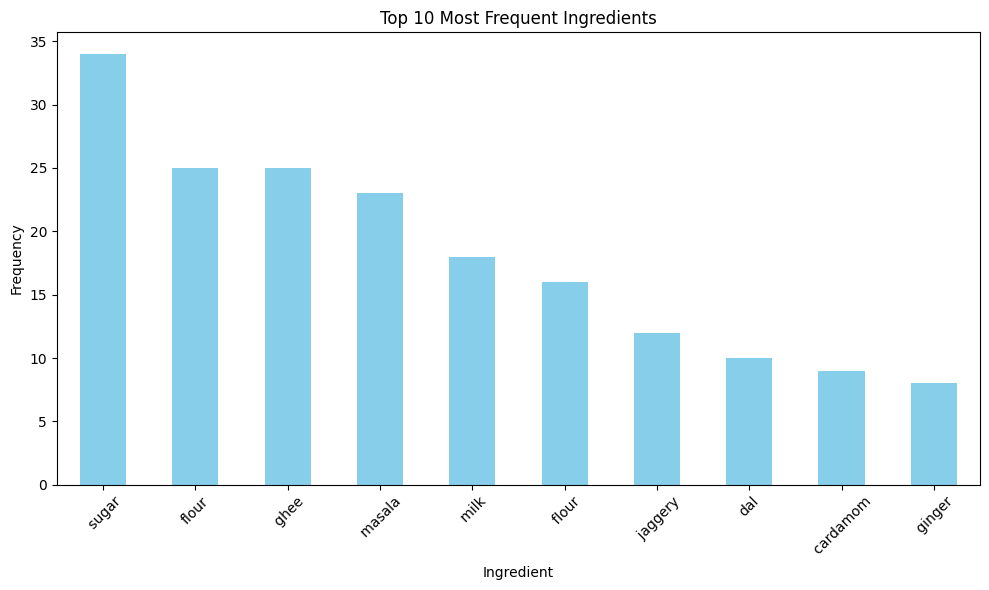

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
top_10_ingredients.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Ingredients')
plt.xlabel('Ingredient')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure that labels fit within the figure
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the ingredients text to TF-IDF vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(data['ingredients'])


k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels to the DataFrame
data['cluster'] = clusters


data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,name,ingredients,diet,cook_time,flavor_profile,course,state,region,Multi_Word_Ingredients,cluster
0,Balu shahi,"flour, yogurt, oil, sugar",vegetarian,25,sweet,dessert,West Bengal,East,[],1
1,Boondi,"flour, ghee, sugar",vegetarian,30,sweet,dessert,Rajasthan,West,[],1
2,Gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60,sweet,dessert,Punjab,North,[],2
3,Ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30,sweet,dessert,Rajasthan,West,"[clarified butter, green cardamom]",2
4,Gulab jamun,"milk, flour, baking powder, ghee, milk, sugar,...",vegetarian,40,sweet,dessert,West Bengal,East,[baking powder],2
...,...,...,...,...,...,...,...,...,...,...
94,Khichdi,"dal, dal, ginger, tomato, green chili",vegetarian,20,spicy,main course,-1,-1,[green chili],0
95,Kofta,"paneer, potato, cream, flour, masala",vegetarian,40,spicy,main course,Uttar Pradesh,North,[],4
96,Kulfi falooda,"rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,25,sweet,dessert,-1,-1,"[rose syrup, falooda sev, mixed nuts]",2
97,Lauki ke kofte,"bottle gourd, masala, flour, ginger, chillies",vegetarian,40,spicy,main course,Uttar Pradesh,North,[bottle gourd],4


In [ ]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=2)  # You can adjust eps and min_samples as needed
cluster_labels = dbscan.fit_predict(tfidf_matrix)

# Add the cluster labels to the DataFrame
data['dbcluster'] = cluster_labels

data

,name,ingredients,diet,cook_time,flavor_profile,course,state,region,Multi_Word_Ingredients,cluster,dbcluster
0,Balu shahi,"flour, yogurt, oil, sugar",vegetarian,25,sweet,dessert,West Bengal,East,[],1,0
1,Boondi,"flour, ghee, sugar",vegetarian,30,sweet,dessert,Rajasthan,West,[],1,0
2,Gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60,sweet,dessert,Punjab,North,[],2,-1
3,Ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30,sweet,dessert,Rajasthan,West,"[clarified butter, green cardamom]",2,-1
4,Gulab jamun,"milk, flour, baking powder, ghee, milk, sugar,...",vegetarian,40,sweet,dessert,West Bengal,East,[baking powder],2,-1
...,...,...,...,...,...,...,...,...,...,...,...
94,Khichdi,"dal, dal, ginger, tomato, green chili",vegetarian,20,spicy,main course,-1,-1,[green chili],0,0
95,Kofta,"paneer, potato, cream, flour, masala",vegetarian,40,spicy,main course,Uttar Pradesh,North,[],4,-1
96,Kulfi falooda,"rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,25,sweet,dessert,-1,-1,"[rose syrup, falooda sev, mixed nuts]",2,-1
97,Lauki ke kofte,"bottle gourd, masala, flour, ginger, chillies",vegetarian,40,spicy,main course,Uttar Pradesh,North,[bottle gourd],4,3


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=2.32, linkage='ward')
cluster_labels = agg_clustering.fit_predict(tfidf_matrix.toarray())

data["hier_clusters"] = cluster_labels
data

,name,ingredients,diet,cook_time,flavor_profile,course,state,region,Multi_Word_Ingredients,cluster,dbcluster,hier_clusters
0,Balu shahi,"flour, yogurt, oil, sugar",vegetarian,25,sweet,dessert,West Bengal,East,[],1,0,0
1,Boondi,"flour, ghee, sugar",vegetarian,30,sweet,dessert,Rajasthan,West,[],1,0,1
2,Gajar ka halwa,"carrots, milk, sugar, ghee, cashews, raisins",vegetarian,60,sweet,dessert,Punjab,North,[],2,-1,2
3,Ghevar,"flour, ghee, kewra, milk, clarified butter, su...",vegetarian,30,sweet,dessert,Rajasthan,West,"[clarified butter, green cardamom]",2,-1,3
4,Gulab jamun,"milk, flour, baking powder, ghee, milk, sugar,...",vegetarian,40,sweet,dessert,West Bengal,East,[baking powder],2,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Khichdi,"dal, dal, ginger, tomato, green chili",vegetarian,20,spicy,main course,-1,-1,[green chili],0,0,4
95,Kofta,"paneer, potato, cream, flour, masala",vegetarian,40,spicy,main course,Uttar Pradesh,North,[],4,-1,0
96,Kulfi falooda,"rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,25,sweet,dessert,-1,-1,"[rose syrup, falooda sev, mixed nuts]",2,-1,0
97,Lauki ke kofte,"bottle gourd, masala, flour, ginger, chillies",vegetarian,40,spicy,main course,Uttar Pradesh,North,[bottle gourd],4,3,0
